# Python Data Science

#### This is a data science exercise illustrated by Vik Paruchuri, Dataquest.io.

The original source of the exercise can be found here: http://www.kdnuggets.com/2015/10/r-vs-python-data-analysis.html

In [2]:
import os

The dataset we will be using for this exercise can be obtained from the link -> https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

### Change the Current Working Directory

In [3]:
os.chdir(r'C:\Users\CDRONAVA\Downloads')
os.getcwd()

'C:\\Users\\CDRONAVA\\Downloads'

### Read a csv file

In [1]:
import pandas as pd

In [4]:
nba = pd.read_csv('nba_2013.csv')

In [5]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


No. of players 

In [6]:
nba.shape

(481, 31)

In [7]:
nba.head(1)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013


### Find the Average of each statistic in the data set

In [8]:
nba.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

### Make a pairwise scatterplots

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

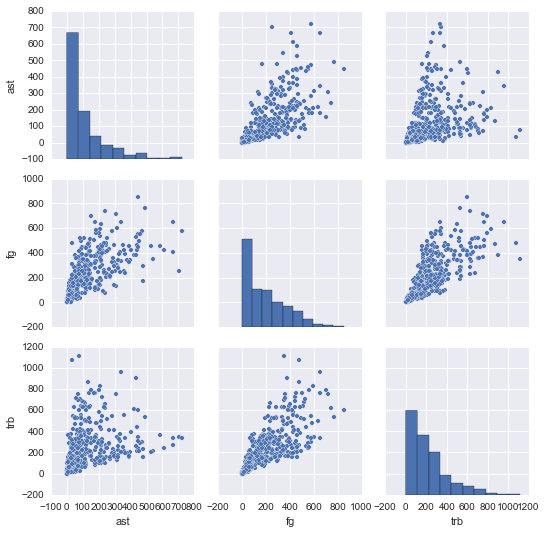

In [29]:
sns.pairplot(nba[["ast","fg","trb"]])

In [30]:
plt.show()

### Make clusters of the players

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans_model = KMeans(n_clusters=5, random_state=1)

In [15]:
good_columns = nba._get_numeric_data().dropna(axis=1)

In [16]:
kmeans_model.fit(good_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [17]:
labels = kmeans_model.labels_

### Plot players by cluster

C:\Users\CDRONAVA\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


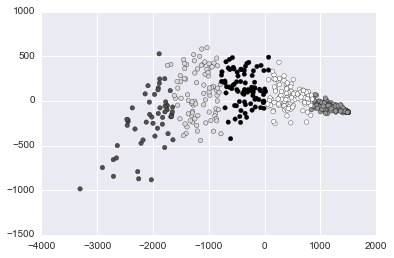

In [18]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y = plot_columns[:,1], c = labels)
plt.show()

#### Split into Training and Testing Sets

In [19]:
train = nba.sample(frac=0.8, random_state=1)
test = nba.loc[~nba.index.isin(train.index)]

###### Univariate Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[["fg"]], train[["ast"]])
predictions = lr.predict(test[["fg"]])

#### Calculate Summary statistics for the model

In [21]:
import statsmodels.formula.api as sm
model = sm.ols(formula='ast ~ fga', data = train)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ast   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     492.1
Date:                Fri, 16 Oct 2015   Prob (F-statistic):           1.03e-70
Time:                        15:36:20   Log-Likelihood:                -2273.3
No. Observations:                 385   AIC:                             4551.
Df Residuals:                     383   BIC:                             4559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.3302      6.855     -0.340      0.734       -15.808    11.147
fga            0.2712      0.012     22.183      0.000         0.247     0.295
==============================================================================
Omnibus:                      162.497   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.356
Skew:                           1.744   Prob(JB):                    3.67e-185
Kurtosis:                       9.386   Cond. No.                         847.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Fit a Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestRegressor
predictor_columns = ["age","mp","fg","trb","stl","blk"]
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(train[predictor_columns], train["ast"])
predictions = rf.predict(test[predictor_columns])

###Calculate Error

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["ast"], predictions)

5081.9047009332717

### Download a Webpage

In [24]:
import requests
url = "http://www.basketball-reference.com/boxscores/201506140GSW.html"
data = requests.get(url).content 

###Extract player box scores

In [25]:
from bs4 import BeautifulSoup

In [26]:
from bs4 import BeautifulSoup
import re
soup = BeautifulSoup(data, 'html.parser')
box_scores = []
for tag in soup.find_all(id=re.compile("[A-Z]{3,}_basic")):
    rows = []
    for i, row in enumerate(tag.find_all("tr")):
        if i == 0:
            continue
        elif i == 1:
            tag = "th"
        else:
            tag = "td"
        row_data = [item.get_text() for item in row.find_all(tag)]
    rows.append(row_data)
box_scores.append(rows)

In [27]:
box_scores

[[[u'Team Totals',
   u'240',
   u'36',
   u'75',
   u'.480',
   u'12',
   u'26',
   u'.462',
   u'20',
   u'34',
   u'.588',
   u'11',
   u'32',
   u'43',
   u'25',
   u'7',
   u'2',
   u'16',
   u'25',
   u'104',
   u'']]]